## Practical No. 7

### A. Decision Tree
#### Introduction
Bagging, short for Bootstrap Aggregation, is an ensemble learning technique that combines multiple base models to make predictions. It aims to improve the stability and accuracy of individual models by reducing variance and minimizing overfitting. In this implementation, we will utilize the Bagging algorithm with Decision Trees as the base model.

#### Algorithm Overview
The Bagging algorithm with Decision Trees works as follows:

1. Data Preparation: Prepare the dataset by cleaning, preprocessing, and splitting it into a training set and a test set.

2. Bagging Process:
   - Choose the number of base models (decision trees) to include in the ensemble.
   - For each base model:
     - Randomly select a subset of the training data (with replacement) called a bootstrap sample.
     - Train a decision tree model on the bootstrap sample.
     - Store the trained decision tree model.

3. Prediction:
   - For a new data point:
     - Make predictions using each decision tree in the ensemble.
     - Combine the predictions, either by majority voting (for classification) or averaging (for regression), to obtain the final prediction.

4. Evaluation: Evaluate the performance of the bagging ensemble model on the test set using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, or mean squared error.

#### Implementation Steps

1. Import the required libraries: NumPy, Pandas, and Scikit-learn.

2. Load and preprocess the dataset: Load the dataset into a Pandas DataFrame and perform any necessary preprocessing steps such as handling missing values, feature scaling, or encoding categorical variables.

3. Split the dataset: Split the dataset into training and test sets using Scikit-learn's train_test_split function.

4. Define the number of base models: Determine the number of decision trees (base models) to include in the ensemble.

5. Initialize an empty list to store the decision tree models.

6. Bagging Process:
   - For each base model:
     - Randomly select a bootstrap sample from the training set using Scikit-learn's resample function.
     - Train a decision tree model on the bootstrap sample using Scikit-learn's DecisionTreeClassifier (for classification) or DecisionTreeRegressor (for regression).
     - Store the trained decision tree model in the list.

7. Prediction:
   - For a new data point:
     - Iterate over the decision tree models in the list.
     - Make predictions using each decision tree model.
     - Combine the predictions by majority voting (for classification) or averaging (for regression) to obtain the final prediction.

8. Evaluate the model: Use appropriate evaluation metrics to assess the performance of the bagging ensemble model on the test set.





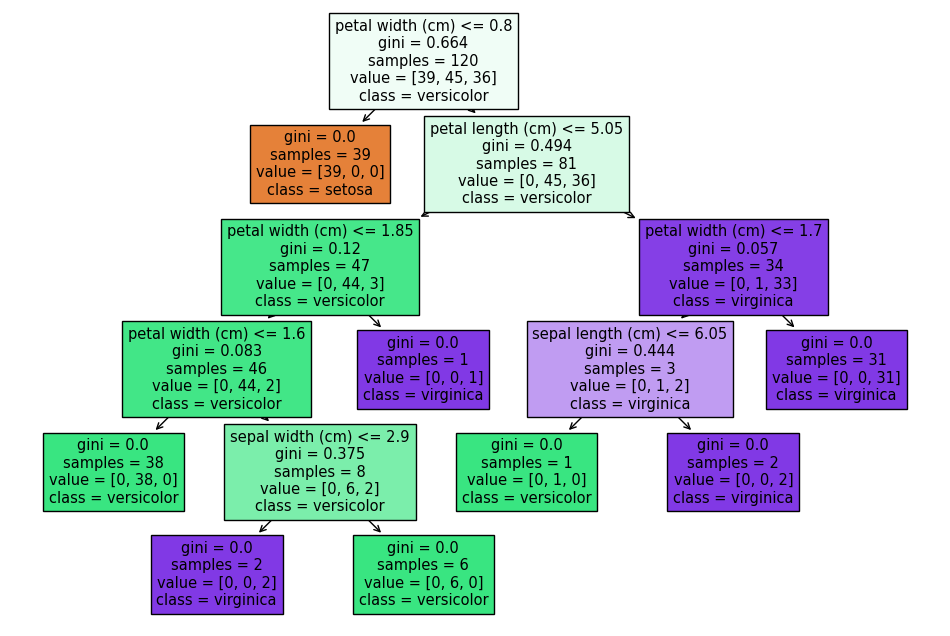

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of base models (decision trees)
num_trees = 10

# Initialize an empty list to store the decision tree models
tree_models = []

# Bagging Process
for _ in range(num_trees):
    # Randomly select a bootstrap sample from the training set
    X_boot, y_boot = resample(X_train, y_train, replace=True, random_state=42)
    
    # Train a decision tree model on the bootstrap sample
    tree = DecisionTreeClassifier()
    tree.fit(X_boot, y_boot)
    
    # Store the trained decision tree model
    tree_models.append(tree)

# Choose one decision tree model to plot
tree_to_plot = tree_models[0]

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree_to_plot, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


### B. Random Forest
Random Forest is an ensemble learning algorithm that combines multiple decision trees to create a powerful predictive model. It is a popular machine learning algorithm known for its effectiveness in handling complex tasks, including both classification and regression problems.

The Random Forest algorithm builds an ensemble of decision trees by introducing two key sources of randomness: random sampling of the training data and random feature selection. Here's how Random Forest works:

1. Data Preparation: Prepare the dataset by cleaning, preprocessing, and splitting it into a training set and a test set.

2. Random Forest Training:
   - Choose the number of decision trees (estimators) to include in the Random Forest.
   - For each decision tree:
     - Randomly sample the training data with replacement, creating a bootstrap sample.
     - Randomly select a subset of features from the original feature set.
     - Train a decision tree model using the bootstrap sample and selected features.
     - Store the trained decision tree in the Random Forest ensemble.

3. Prediction:
   - For a new data point:
     - Pass the data point through each decision tree in the ensemble.
     - Collect the predictions from each decision tree.
     - Combine the predictions by majority voting (for classification) or averaging (for regression) to obtain the final prediction.

4. Evaluation: Evaluate the performance of the Random Forest model on the test set using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, or mean squared error.

Random Forest offers several benefits:

1. Robustness: Random Forest reduces overfitting by aggregating multiple decision trees and considering a subset of features for each tree. It tends to provide more accurate predictions compared to individual decision trees.

2. Handling High-Dimensional Data: Random Forest performs well even with datasets that have a large number of features. It automatically selects informative features by randomly sampling subsets of features for each decision tree.

3. Handling Non-Linear Relationships: Random Forest can capture complex non-linear relationships between features and target variables by combining multiple decision trees.

4. Outlier Robustness: Random Forest is relatively robust to outliers due to the averaging or voting mechanism employed during prediction.

5. Variable Importance: Random Forest can provide a measure of feature importance, indicating which features are most influential in the prediction process.

Random Forest is widely used in various domains, including finance, healthcare, marketing, and image processing. It is an effective and versatile algorithm for both classification and regression tasks, providing accurate and robust predictions.

Random Forest Accuracy: 0.7666666666666667


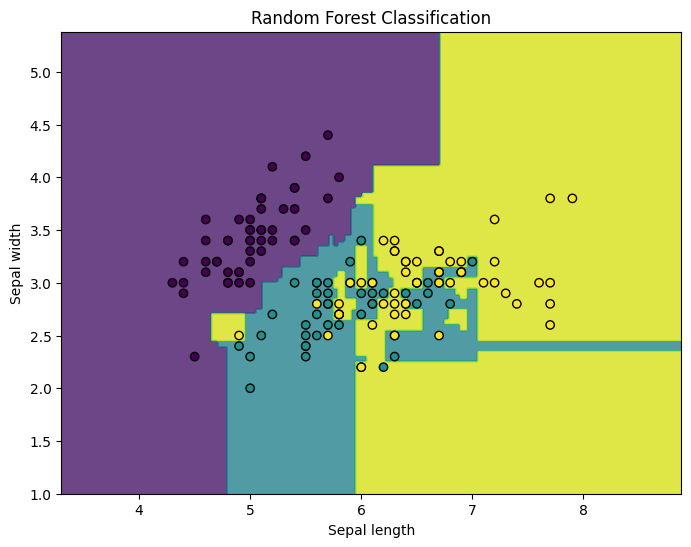

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dataset = load_iris()
X, y = dataset.data[:, :2], dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_classifier = RandomForestClassifier(n_estimators=10)

random_forest_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = random_forest_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Random Forest Classification')
plt.show()


Bagging Accuracy (Random Forest): 0.7666666666666667


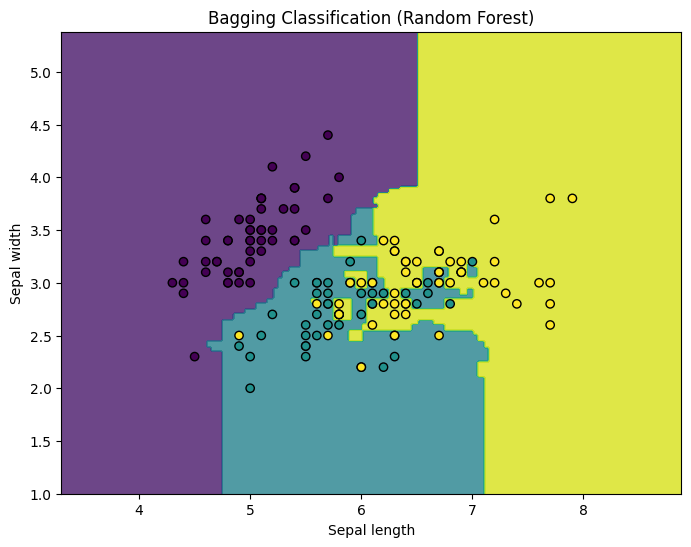

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dataset = load_iris()
X, y = dataset.data[:, :2], dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifier = RandomForestClassifier(n_estimators=10)

bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10)

bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Bagging Accuracy (Random Forest):", accuracy)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bagging_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Bagging Classification (Random Forest)')
plt.show()


## Conclusion
*   The Bagging algorithm with Decision Trees is a powerful ensemble learning technique that combines multiple decision tree models to improve prediction accuracy and reduce overfitting. By using bootstrap sampling and aggregating the predictions of individual decision trees, bagging provides a robust and effective method for classification and regression tasks. Implementation of the algorithm involves data preparation, bagging process, prediction, and evaluation steps.
*   Random Forest is a powerful ensemble learning algorithm that combines multiple decision trees to create a robust and accurate predictive model. By introducing randomness through bootstrap sampling and feature selection, Random Forest addresses the limitations of individual decision trees and improves generalization performance.